# Lab 4: CCD Characterization
Deryl Long

## Abstract

Charge coupled devices (CCDs) are crucial instruments for astronomers, as they are the best method we have for collecting images/data for our observations. This lab helps us understand how to find critical information about a specific CCD by taking measurements and finding the read noise, gain, and dark current values. Specifically, we take bias frames and light frames in order to measure read noise and gain. We use numerical techniques and plots to examine these values and look for evidence of non-linearity in our data. We find that there is non-linearity in the data, as the gain is not perfectly consistent, suggesting that the CCD is not top-notch, as it does not display a linear response. We also take dark frames and bias frames in order to look at the dark current of the CCD. By using numerical techniques of examining our data, we gain a better understanding of how the CCD works, and of the implications from our data about read noise, gain and dark current.

## Introduction

Charge coupled devices (CCDs) are semi-conductor based photodiodes which convert light photons to electrons and produce a readout via an analog signal processor and analog to digital converter, which ultimately displays a digital picture. CCDs can be characterized by a number of properties- most importantly, their read-noise, gain and dark current. We can study these characteristics by taking certain types of frames.

Bias frames are zero exposure time frames that allow us to measure read-noise. One can compare pixels from any one bias frame to a "master bias" (comprised of many repeated bias frames), which has negligible noise, to get the standard deviation . This standard deviation is the read-noise for a certain pixel location. A good CCD will have a low read-noise. 

Dark frames have no incident light, but the same exposure time as the target. These frames allow one to measure dark current, which is a property dependent on the CCD's temperature. A good CCD will be well cooled, and will ideally have a low/negligible dark current. 

By taking a number of bias frames, dark frames, and normal light frames, and utilizing numercial techniques of analysis, we aim to study and understand the characteristics specific to the Angell Hall CCD.


## Theory

#### Measuring Read-Noise and Gain 

Gain is defined as the conversion factor between electrons and ADU. This is an important property of a CCD, and can be measured by plotting the mean of the signal (y-axis) versus photon noise squared, ie the variance (x-axis). Note that singal refers to the mean of a region of pixels. On such a plot, the slope is equal to the gain. We understand this relation by looking at the equation (1) for photon noise:

$$ \sigma_{ADU} = \sqrt{\frac{N_{ADU}}{g}} \ \ \ \ (1)$$

Equation 1 comes from our understanding that photon noise obeys Poisson statistics. We can solve equation (1) for gain to get the following relation (2), which proves that the slope of the described graph is equal to the gain:

$$ g = \frac{N_{ADU}}{\sigma_{ADU}^2} \ \ \ \ (2) $$

Where $\sigma$ is the photon noise, N is the signal, and g is the gain value that we are looking for. 

Once one has measured the gain of the CCD, one can estimate read-noise. Read-noise is defined as the standard devation from the mean value of a large number of readouts for a given pixel location. Read-noise is the result of amplification within the CCD, amplification being the process that takes the analog signal output and, quite literally, amplifies it for use in the analog to digital convertor. One can estimate the overall read-noise by looking at a distribution of values from a CCD array. 

Generally, one can get a value for read-noise, in terms of electrons, via this equation (3):

$$ \sigma_{RN, e} = g\sigma_{RN, ADU} \ \ \ \ (3)$$

Experimentally, one can estimate the read-noise as the standard deviation of a bias frame from a mean of many bias frames. If the readout of the CCD is in terms of ADU, one can then use equation (3) to estimate the read-noise in terms of electrons. 


#### Measuring Bandgap and Dark Current Constant

Dark current is a property of a CCD which is inherent in the CCD itself, meaning that its exists regardless of whether or not photons are entering the device. Dark current is a very small electric current that is induced when a temperature in the CCD causes electrons to become thermally excited and jump into the conduction band. 

Dark current follows the relation given by equation (4):

$$ Dark \ Current \ Trend = AT^{3/2}e^{\frac{-E_g}{2kT}} \ \ \ \ (4)$$

Where A is a constant, T is the CCD temperature, k is the Boltzmann constant,  and $E_g$ is the difference between the bandgap energy for the semiconductor. 

## Methodology

### Part 1: Read-Noise and Gain

We first offer an experimental measurement of read noise, by making an estimation using bias frames. This is accomplished by taking the standard deviation of each pixel value for the 20 bias frames:

<function matplotlib.pyplot.show>

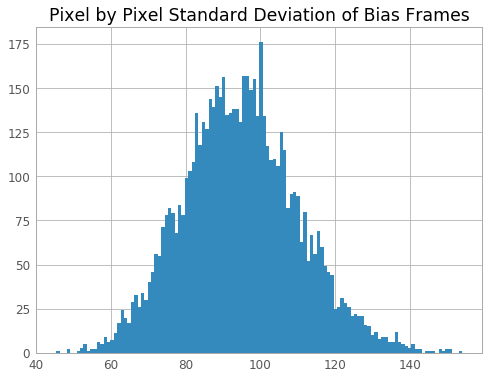

In [47]:
#finding gain and readnoise

#importing files for bias frames

%matplotlib inline
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.io import fits
import numpy as np

bias_boys = []
for i in range(1,10):
    bias_boys.append(fits.getdata("bias_boys.0000000{}.fit".format(i) , ext=0).astype(np.int))
for i in range(10,21):
    bias_boys.append(fits.getdata("bias_boys.000000{}.fit".format(i) , ext=0).astype(np.int))
    
mean_bias = sum(bias_boys)/20 #gives array of means for each pixel

std_bias = np.zeros((53,119))
bias_col = []

def biastd():
    for i in range(53):
        for j in range(119):
            bias_col = np.array([b[i,j] for b in bias_boys])
            std_bias[i,j] = bias_col.std()            
    return(std_bias)

plt.hist(biastd().flatten(), 120)
plt.title('Pixel by Pixel Standard Deviation of Bias Frames')
plt.show

### Experimentally Measured Read-Noise:

We understand from the theory section that one can estimate the read-noise from a distribution (in the form of the histogram above) of values from the entire CCD array by assuming that all pixels have the same value. By employing this methodology, we can confidently estimate that a read-noise value for our CCD should fall between about 90 and 110. We can multiply the values of read-noise here by our gain value to get read-noise in terms of electrons. 

We then measure an experimental value for the gain of the CCD. This is accomplished by making a plot of which the slope is equal to gain. 

In [18]:
#importing files for different light levels (set_0.1 etc) and filling arrays for each 

light1 = []
light2 = []
light3 = []
light4 = []
light5 = []
light6 = []
light7 = []
light8 = []
light9 = []
light10 = []
light11 = []

for i in range(1,6):
    light1.append(fits.getdata("set_0.1.0000000{}.fit".format(i) , ext=0).astype(np.int))
    light2.append(fits.getdata("set_0.2.0000000{}.fit".format(i) , ext=0).astype(np.int))
    light3.append(fits.getdata("set_0.3.0000000{}.fit".format(i) , ext=0).astype(np.int))
    light4.append(fits.getdata("set_0.4.0000000{}.fit".format(i) , ext=0).astype(np.int))
    light5.append(fits.getdata("set_0.5.0000000{}.fit".format(i) , ext=0).astype(np.int))
    light6.append(fits.getdata("set_0.6.0000000{}.fit".format(i) , ext=0).astype(np.int))
    light7.append(fits.getdata("set_0.7.0000000{}.fit".format(i) , ext=0).astype(np.int))
    light8.append(fits.getdata("set_0.8.0000000{}.fit".format(i) , ext=0).astype(np.int))
    light9.append(fits.getdata("set_0.9.0000000{}.fit".format(i) , ext=0).astype(np.int))
    light10.append(fits.getdata("set_1.0.0000000{}.fit".format(i) , ext=0).astype(np.int))
    light11.append(fits.getdata("set_1.1.0000000{}.fit".format(i) , ext=0).astype(np.int))
    

In [19]:
#find the average of the bias and find its shape

avgbias = sum(bias_boys)/20
print(avgbias)
print(avgbias.shape)

[[ 11745.6   11704.3   11736.85 ...,  11704.05  11680.85  11697.1 ]
 [ 11750.75  11736.55  11803.15 ...,  11728.45  11695.8   11712.8 ]
 [ 11761.65  11785.8   11724.6  ...,  11685.35  11650.75  11669.9 ]
 ..., 
 [ 11744.6   11750.95  11746.15 ...,  11707.55  11677.8   11716.4 ]
 [ 11744.3   11748.6   11776.55 ...,  11692.85  11711.85  11755.5 ]
 [ 11786.5   11766.25  11773.7  ...,  11704.15  11719.45  11687.1 ]]
(53, 119)


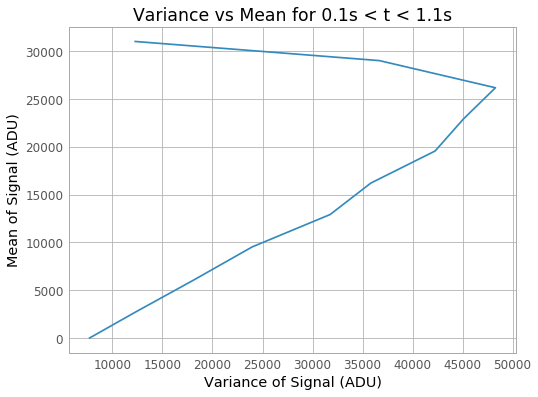

Gain Estimate = 0.415747175465


In [49]:
#find mean of the bias frames (array) - this will ultimately be subtracted from the light frames to make 
#corrected frames for our signal values

meanbias = sum(bias_boys)/len(bias_boys)

mean1 = sum(light1)/5 #find mean of each exposure time (light level) given 5 frames at each level
mean2 = sum(light2)/5
mean3 = sum(light3)/5 
mean4 = sum(light4)/5
mean5 = sum(light5)/5
mean6 = sum(light6)/5
mean7 = sum(light7)/5
mean8 = sum(light8)/5
mean9 = sum(light9)/5
mean10 = sum(light10)/5
mean11 = sum(light11)/5

#correcting each signal frame by subracting mean bias frame: define arrays and then fill

fix_light1 = [np.zeros((53,119)) for a in range(5)]
fix_light2 = [np.zeros((53,119)) for a in range(5)]
fix_light3 = [np.zeros((53,119)) for a in range(5)]
fix_light4 = [np.zeros((53,119)) for a in range(5)]
fix_light5 = [np.zeros((53,119)) for a in range(5)]
fix_light6 = [np.zeros((53,119)) for a in range(5)]
fix_light7 = [np.zeros((53,119)) for a in range(5)]
fix_light8 = [np.zeros((53,119)) for a in range(5)]
fix_light9 = [np.zeros((53,119)) for a in range(5)]
fix_light10 = [np.zeros((53,119)) for a in range(5)]
fix_light11= [np.zeros((53,119)) for a in range(5)]

i = 1
j = 1
k = 1

for k in range(5):
    for i in range(53):
        for j in range(119):
            fix_light1[k][i,j] = light1[k][i,j] - meanbias[i,j]
            fix_light2[k][i,j] = light2[k][i,j] - meanbias[i,j]
            fix_light3[k][i,j] = light3[k][i,j] - meanbias[i,j]
            fix_light4[k][i,j] = light4[k][i,j] - meanbias[i,j]
            fix_light5[k][i,j] = light5[k][i,j] - meanbias[i,j]
            fix_light6[k][i,j] = light6[k][i,j] - meanbias[i,j]
            fix_light7[k][i,j] = light7[k][i,j] - meanbias[i,j]
            fix_light8[k][i,j] = light8[k][i,j] - meanbias[i,j]
            fix_light9[k][i,j] = light9[k][i,j] - meanbias[i,j]
            fix_light10[k][i,j] = light10[k][i,j] - meanbias[i,j]
            fix_light11[k][i,j] = light11[k][i,j] - meanbias[i,j] #result here is the corrected frames at every exposure time, but these are stil sets of 5 frames each
            
            
#get an avg frame for each light level, take the mean of that frame, which you can plot as signal (ie mean number of counts) vs variance (std squared)

fix_mean1 = sum(fix_light1)/5
fix_mean2 = sum(fix_light2)/5
fix_mean3 = sum(fix_light3)/5
fix_mean4 = sum(fix_light4)/5
fix_mean5 = sum(fix_light5)/5
fix_mean6 = sum(fix_light6)/5
fix_mean7 = sum(fix_light7)/5
fix_mean8 = sum(fix_light8)/5
fix_mean9 = sum(fix_light9)/5
fix_mean10 = sum(fix_light10)/5
fix_mean11 = sum(fix_light11)/5

final_mean1 = np.mean(fix_mean1)
final_mean2 = np.mean(fix_mean2)
final_mean3 = np.mean(fix_mean3)
final_mean4 = np.mean(fix_mean4)
final_mean5 = np.mean(fix_mean5)
final_mean6 = np.mean(fix_mean6)
final_mean7 = np.mean(fix_mean7)
final_mean8 = np.mean(fix_mean8)
final_mean9 = np.mean(fix_mean9)
final_mean10 = np.mean(fix_mean10)
final_mean11 = np.mean(fix_mean11)

#create array of mean signal values (to plot)
mean_signal = (final_mean1, final_mean2, final_mean3, final_mean4, final_mean5, final_mean6, final_mean7, final_mean8, final_mean9, final_mean10, final_mean11)


std_sig1 = np.zeros((53,119))
std_sig2 = np.zeros((53,119))
std_sig3 = np.zeros((53,119))
std_sig4 = np.zeros((53,119))
std_sig5 = np.zeros((53,119))
std_sig6 = np.zeros((53,119))
std_sig7 = np.zeros((53,119))
std_sig8 = np.zeros((53,119))
std_sig9 = np.zeros((53,119))
std_sig10 = np.zeros((53,119))
std_sig11 = np.zeros((53,119))

sig_col1 = []
sig_col2 = []
sig_col3 = []
sig_col4 = []
sig_col5 = []
sig_col6 = []
sig_col7 = []
sig_col8 = []
sig_col9 = []
sig_col10 = []
sig_col11 = []

i = 1
j = 1
for i in range(53):
    for j in range(119):
        sig_col1 = np.array([s[i,j] for s in fix_light1])
        std_sig1[i,j] = sig_col1.std()
            
        sig_col2 = np.array([s[i,j] for s in fix_light2])
        std_sig2[i,j] = sig_col2.std()
            
        sig_col3 = np.array([s[i,j] for s in fix_light3])
        std_sig3[i,j] = sig_col3.std()
            
        sig_col4 = np.array([s[i,j] for s in fix_light4])
        std_sig4[i,j] = sig_col4.std()
        
        sig_col5 = np.array([s[i,j] for s in fix_light5])
        std_sig5[i,j] = sig_col5.std()
            
        sig_col6 = np.array([s[i,j] for s in fix_light6])
        std_sig6[i,j] = sig_col6.std()
            
        sig_col7 = np.array([s[i,j] for s in fix_light7])
        std_sig7[i,j] = sig_col7.std()
            
        sig_col8 = np.array([s[i,j] for s in fix_light8])
        std_sig8[i,j] = sig_col8.std()
            
        sig_col9 = np.array([s[i,j] for s in fix_light9])
        std_sig9[i,j] = sig_col9.std()
            
        sig_col10 = np.array([s[i,j] for s in fix_light10])
        std_sig10[i,j] = sig_col10.std()
            
        sig_col11 = np.array([s[i,j] for s in fix_light11])
        std_sig11[i,j] = sig_col11.std()
            

#make empty arrays for variance of signal and then fill via function
sig_var1 = np.zeros((53,119))
sig_var2 = np.zeros((53,119))
sig_var3 = np.zeros((53,119))
sig_var4 = np.zeros((53,119))
sig_var5 = np.zeros((53,119))
sig_var6 = np.zeros((53,119))
sig_var7 = np.zeros((53,119))
sig_var8 = np.zeros((53,119))
sig_var9 = np.zeros((53,119))
sig_var10 = np.zeros((53,119))
sig_var11= np.zeros((53,119))


for i in range(53):
    for j in range(119):
        sig_var1[i,j] = (std_sig1[i,j])**2
        sig_var2[i,j] = (std_sig2[i,j])**2
        sig_var3[i,j] = (std_sig3[i,j])**2
        sig_var4[i,j] = (std_sig4[i,j])**2
        sig_var5[i,j] = (std_sig5[i,j])**2
        sig_var6[i,j] = (std_sig6[i,j])**2
        sig_var7[i,j] = (std_sig7[i,j])**2
        sig_var8[i,j] = (std_sig8[i,j])**2
        sig_var9[i,j] = (std_sig9[i,j])**2
        sig_var10[i,j] = (std_sig10[i,j])**2
        sig_var11[i,j] = (std_sig11[i,j])**2
        
#take means to get the final signal variance to plot

var_signal = (np.mean(sig_var1), np.mean(sig_var2), np.mean(sig_var3), np.mean(sig_var4), np.mean(sig_var5), np.mean(sig_var6), np.mean(sig_var7), np.mean(sig_var8), np.mean(sig_var9), np.mean(sig_var10), np.mean(sig_var11))

plt.plot(var_signal, mean_signal)
plt.title('Variance vs Mean for 0.1s < t < 1.1s')
plt.xlabel('Variance of Signal (ADU)')
plt.ylabel('Mean of Signal (ADU)')
plt.show()

#calculate gain at each exp time and compare:

gain_01 = final_mean1/np.mean(sig_var1)
gain_02 = final_mean2/np.mean(sig_var2)
gain_03 = final_mean3/np.mean(sig_var3)
gain_04 = final_mean4/np.mean(sig_var4)
gain_05 = final_mean5/np.mean(sig_var5)
gain_06 = final_mean6/np.mean(sig_var6)
gain_07 = final_mean7/np.mean(sig_var7)
gain_08 = final_mean8/np.mean(sig_var8)
gain_09 = final_mean9/np.mean(sig_var9)
gain_10 = final_mean10/np.mean(sig_var10)
gain_11 = final_mean11/np.mean(sig_var11)


best_gain_avg = (gain_02+gain_03+gain_04+gain_05+gain_06+gain_07+gain_08+gain_09)/8
print('Gain Estimate =', best_gain_avg)
        





### Experimentally measured Gain:

We see that for exposure times past 0.9 seconds, the frame becomes saturated, as the slope (g) is no longer following a generally linear trend. The point at which saturation begins to occur can be defined as "full well depth". By printing the values of the gain (rise over run for this plot) at each exposure time, we see that the gain is not always the same, and looks to be the best linear fit from 0.2 seconds through 0.9 seconds. If we examine the slope of the graph from 0.2 seconds to 0.9 seconds, we get a general estimate for our gain value. From this plot, we estimate a gain of about 0.42. 

## Part 2: Dark Current

We can analyze data from the Angell Hall CCD in order to plot its observed dark current and estimate the constant A, as well as the value of E, which is the difference in the bandgap energy for the semiconductor. 

In [5]:
#finding dark current 

# list to store 20 bias frames

bias4 = []
bias6 = []
bias8 = []
bias10 = []
bias12 = []
bias14 = []
bias16 = []

# append bias fits to the bias list

i = 1
for i in range(1,10):
    bias4.append(fits.getdata("bias4.0000000{}.HIP 70469.Bias.fit".format(i) , ext=0).astype(np.int))
    bias6.append(fits.getdata("bias6.0000000{}.HIP 70469.Bias.fit".format(i) , ext=0).astype(np.int))
    bias8.append(fits.getdata("bias8.0000000{}.HIP 70469.Bias.fit".format(i) , ext=0).astype(np.int))
    bias10.append(fits.getdata("bias10.0000000{}.HIP 70469.Bias.fit".format(i) , ext=0).astype(np.int))
    bias12.append(fits.getdata("bias12.0000000{}.HIP 70469.Bias.fit".format(i) , ext=0).astype(np.int))
    bias14.append(fits.getdata("bias14.0000000{}.HIP 70469.Bias.fit".format(i) , ext=0).astype(np.int))
    bias16.append(fits.getdata("bias16.0000000{}.HIP 70469.Bias.fit".format(i) , ext=0).astype(np.int))
for i in range(10,11):
    bias4.append(fits.getdata("bias4.000000{}.HIP 70469.Bias.fit".format(i) , ext=0).astype(np.int))
    bias6.append(fits.getdata("bias6.000000{}.HIP 70469.Bias.fit".format(i) , ext=0).astype(np.int))
    bias8.append(fits.getdata("bias8.000000{}.HIP 70469.Bias.fit".format(i) , ext=0).astype(np.int))
    bias10.append(fits.getdata("bias10.000000{}.HIP 70469.Bias.fit".format(i) , ext=0).astype(np.int))
    bias12.append(fits.getdata("bias12.000000{}.HIP 70469.Bias.fit".format(i) , ext=0).astype(np.int))
    bias14.append(fits.getdata("bias14.000000{}.HIP 70469.Bias.fit".format(i) , ext=0).astype(np.int))
    bias16.append(fits.getdata("bias16.000000{}.HIP 70469.Bias.fit".format(i) , ext=0).astype(np.int))

# lists to store 7 dark frames (each w/ 2 images). Dark frames = 20 second exposure time each
dark4 = []
dark6 = []
dark8 = []
dark10 = []
dark12 = []
dark14 = []
dark16 = []

# append exposure file to the array for that exposure

i = 1
for i in range(1,3):
    dark4.append(fits.getdata("dark4.0000000{}.HIP 70469.Dark.fit".format(i) , ext=0).astype(np.int))
    dark6.append(fits.getdata("dark6.0000000{}.HIP 70469.Dark.fit".format(i) , ext=0).astype(np.int))
    dark8.append(fits.getdata("dark8.0000000{}.HIP 70469.Dark.fit".format(i) , ext=0).astype(np.int))
    dark10.append(fits.getdata("dark10.0000000{}.HIP 70469.Dark.fit".format(i) , ext=0).astype(np.int))
    dark12.append(fits.getdata("dark12.0000000{}.HIP 70469.Dark.fit".format(i) , ext=0).astype(np.int))
    dark14.append(fits.getdata("dark14.0000000{}.HIP 70469.Dark.fit".format(i) , ext=0).astype(np.int))
    dark16.append(fits.getdata("dark16.0000000{}.HIP 70469.Dark.fit".format(i) , ext=0).astype(np.int))

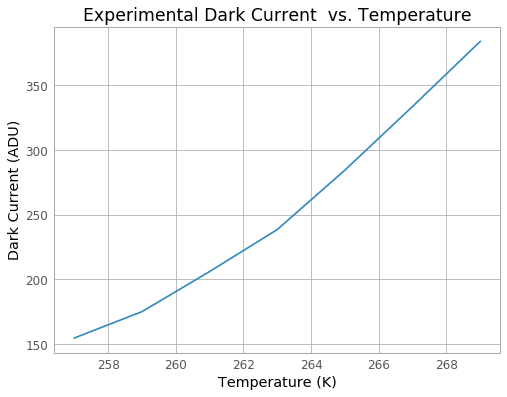

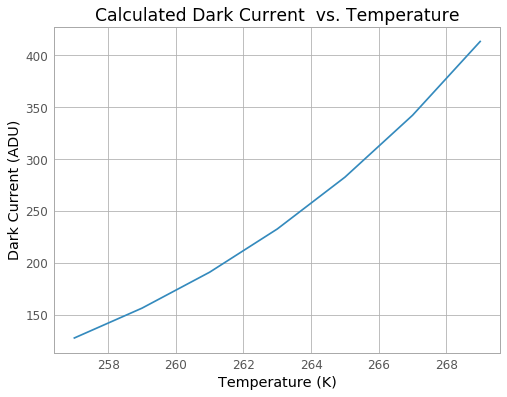

In [57]:
# mean bias frame of the 7 temps (each temp has 10 bias frames, so 70 total bias frames)

bias4_mean = sum(bias4)/10 
bias6_mean = sum(bias6)/10
bias8_mean = sum(bias8)/10
bias10_mean = sum(bias10)/10
bias12_mean = sum(bias12)/10
bias14_mean = sum(bias14)/10
bias16_mean = sum(bias16)/10

# define arrays for each fixed frame (dark minus mean bias)
fix_dark4 = [np.zeros((53, 119)) for a in range(2)]
fix_dark6 = [np.zeros((53, 119)) for a in range(2)]
fix_dark8 = [np.zeros((53, 119)) for a in range(2)]
fix_dark10 = [np.zeros((53, 119)) for a in range(2)]
fix_dark12 = [np.zeros((53, 119)) for a in range(2)]
fix_dark14 = [np.zeros((53, 119)) for a in range(2)]
fix_dark16 = [np.zeros((53, 119)) for a in range(2)]

i = 1
j = 1
k = 1

# calculating the "fixed frame" - dark frames minus the mean bias frame at each temp
for k in range(2):
    for i in range(53):
        for j in range(119):
            fix_dark4[k][i,j] = dark4[k][i,j] - bias4_mean[i,j]
            fix_dark6[k][i,j] = dark6[k][i,j] - bias6_mean[i,j]
            fix_dark8[k][i,j] = dark8[k][i,j] - bias8_mean[i,j]
            fix_dark10[k][i,j] = dark10[k][i,j] - bias10_mean[i,j]
            fix_dark12[k][i,j] = dark12[k][i,j] - bias12_mean[i,j]
            fix_dark14[k][i,j] = dark14[k][i,j] - bias14_mean[i,j]
            fix_dark16[k][i,j] = dark16[k][i,j] - bias16_mean[i,j]

# calculating the mean of the 7 dark frames minus the mean bias frame

fix_dark4_mean = np.zeros((53,119))
fix_dark6_mean = np.zeros((53,119))  
fix_dark8_mean = np.zeros((53,119))  
fix_dark10_mean = np.zeros((53,119))  
fix_dark12_mean = np.zeros((53,119))  
fix_dark14_mean = np.zeros((53,119))  
fix_dark16_mean = np.zeros((53,119))  


fix_dark4_mean = sum(fix_dark4)/2
fix_dark6_mean = sum(fix_dark6)/2
fix_dark8_mean = sum(fix_dark8)/2
fix_dark10_mean = sum(fix_dark10)/2
fix_dark12_mean = sum(fix_dark12)/2
fix_dark14_mean = sum(fix_dark14)/2
fix_dark16_mean = sum(fix_dark16)/2

dark4_mean = np.mean(fix_dark4_mean)
dark6_mean = np.mean(fix_dark6_mean)
dark8_mean = np.mean(fix_dark8_mean)
dark10_mean = np.mean(fix_dark10_mean)
dark12_mean = np.mean(fix_dark12_mean)
dark14_mean = np.mean(fix_dark14_mean)
dark16_mean = np.mean(fix_dark16_mean)

dark_current = (dark16_mean, dark14_mean, dark12_mean, dark10_mean, dark8_mean, dark6_mean, dark4_mean)

temperature = (-16+273, -14+273, -12+273, -10+273, -8+273, -6+273, -4+273)

plt.plot(temperature, dark_current)
plt.title('Experimental Dark Current  vs. Temperature')
plt.ylabel('Dark Current (ADU)')
plt.xlabel('Temperature (K)')
plt.show()

plt.plot([269, 267, 265, 263, 261, 259, 257], [(0.42*45*(10**8))*(269)**(3/2)*np.e**(-(1.1)/(2*(8.617*10**(-5))*(269))), 
                                               (0.42*45*(10**8))*(267)**(3/2)*np.e**(-(1.1)/(2*(8.617*10**(-5))*(267))), 
                                               (0.42*45*(10**8))*(265)**(3/2)*np.e**(-(1.1)/(2*(8.617*10**(-5))*(265))), 
                                               (0.42*45*(10**8))*(263)**(3/2)*np.e**(-(1.1)/(2*(8.617*10**(-5))*(263))),
                                               (0.42*45*(10**8))*(261)**(3/2)*np.e**(-(1.1)/(2*(8.617*10**(-5))*(261))),
                                               (0.42*45*(10**8))*(259)**(3/2)*np.e**(-(1.1)/(2*(8.617*10**(-5))*(259))),
                                               (0.42*45*(10**8))*(257)**(3/2)*np.e**(-(1.1)/(2*(8.617*10**(-5))*(257)))])
plt.title('Calculated Dark Current  vs. Temperature')
plt.ylabel('Dark Current (ADU)')
plt.xlabel('Temperature (K)')
plt.show()

### Experimental Measure of Dark Current:

By plotting dark current vs temperature, we see that the CCD has a fairly significant dark current, which increases quite a lot as temperature increases. We expect these results based on the fact that it is merely fan-cooled and not cooled with the more effective liquid nitrogen.

### Estimating A and E values:

Once we have our dark current plot, we can estimate the values of A and E by working to get a matching fit via trial and error, using the manual calculation of equation (4). This nice fit gives us an estimated value of A of $45x10^8$, and E of 1.1. Comparing this value of E to the value for silicon at 300 K (1.11) , we see that they match well, and this is likely the material of the semi-conductor. 


## Summary

In part 1 of our experiment, we imported data taken from five light frames at eleven different light levels (exposure times), as well as twenty bias frames. The bias frames were each taken with zero incident light and zero exposure time, while the light frames were taken with incident light at exposure times ranging from 0.1 to 1.1 seconds. We measured read-noise by looking at the standard deviation of pixels from the master bias frame, and found that our read-noise is fairly high for this CCD. We then measured the gain by performing a pixel by pixel analysis of the signal for each light level, ultimately getting the variance of the signal and the mean signal. Our plot of these values gives us a slope that is equal to the gain. Our plot also allows us to examine the full well depth of the detector, by estimating the point at which it becomes saturated. 

In part 2 of our experiment, we simply import data taken for two dark frames each at CCD temperatures ranging from -16 to -4 degrees celsius, as well as ten bias frames at each temperature for comparison. Before making any measurements of dark current, we correct the frames for noise by subtracting off a mean bias at each temp. We then plot the dark current versus temperature in order to create a baseline from which to estimate the A and E terms of the dark current relation.  

## Conclusion

Ultimately, parts 1 and 2 of our experiment allow us to make several comments about the quality and characteristics of the Angell Hall CCD. Our findings in part 1 tell us that the CCD has quite a bit of read-noise, and that the gain is inconsistent and non-linear. These characteristics suggest a low quality CCD. Further, part 1 shows us that the CCD has a full well depth occuring after about 0.9 seconds- the time at which it begins to saturate. Part 2 of our experiment reveals that the CCD has a large inherent dark current that increases quickly as temperature increases, due to the poor cooling system. We use the relationship to make inferences about the values of the constant A, and of the value for E (bandgap). We conclude that since the bandgap value inferred matches well with that of silicon, that the CCD likely uses silicon semiconductors. 